In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from np_fun import prob, prob_part
from np_fun_adj import prob_adj as prob_adj

#from tf_fun import init as tf_init

from matplotlib import cm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def plot_ax(ax, data,color='red', label="",xlabel='x'):
    x,yi = data
    fontsize=15
    tick_size = 1
    ax.plot(x,yi,color=color,linewidth=1.7,label='non-ideal')
    #ax.legend(loc=0)
    ax.text(+np.pi-0.4,np.max(yi)*0.97,label, fontsize=16)

    ax.tick_params(axis="y",direction="in",labelsize=13,width=tick_size,length=8)
    ax.tick_params(axis="x",direction="in",labelsize=13,width=tick_size,length=8)
    ax.set_xlabel(xlabel,fontsize=fontsize)
    ax.set_ylim(0.8*np.min(yi)-0.3*np.std(yi),1.2*np.max(yi))
    #ax.set_xlim(np.min(yi)-0.3*np.std(yi),1.2*np.max(yi))
def get_colors(num, provider=cm.brg):
    cm_subsection = np.linspace(0, 1., num) 
    colors = [ cm.brg(x) for x in cm_subsection ]
    return colors

def plot_nice(func,title='adj_plot'):
    start = 0.0
    stop = 1.0
    fontsize =16
    number_of_lines= 3
    plt.rcParams['axes.linewidth'] = 1.2
    tick_size = 1
    #set the value globally
    on_same=False

    colors = get_colors(number_of_lines,provider=cm.brg)
    x = np.linspace(-np.pi,np.pi,100)
    y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
    #y_ideal = np.array(list(map(lambda x: abs(np.power(func_ideal(x),2)),x)))
    #meanmax = np.mean([np.max(y) for y in y.T])
    #meanmax_i = np.mean([np.max(yi) for yi in y_ideal.T])
    #scaler = (meanmax/meanmax_i)
    labels = [r"$| %i \rangle$"%i for i in range(3)]
    ids= ['(a)','(b)','(c)']

    if on_same:
        f, ax = plt.subplots(1,1,figsize=(8,5))
        for i,color,label in zip(y.T,colors,labels):
            ax.plot(x,i,color=color,linewidth=1.7,label=label)
            ax.tick_params(axis="y",direction="in",labelsize=13,width=2,length=8)
            ax.tick_params(axis="x",direction="in",labelsize=13,width=2,length=8)
    else:
        f, axs = plt.subplots(1,3,figsize=(15,5))
        axs[0].set_ylabel(' Intensity ', fontsize=fontsize)
        for i, yi,color,label,id_ in zip(range(len(colors)),
                                           y.T,
                                           #y_ideal.T,
                                           colors,
                                           labels,ids):
            ax = axs[i]
            plot_ax(ax,(x,yi),color=color,label=label)

            #ax.set_title(label,fontsize=fontsize)
    #plt.legend()

    #plt.xlabel(' x ',fontsize=fontsize)
    #plt.ylabel(' Intensity ', fontsize=fontsize)

    plt.savefig(title+'.pdf')
    plt.show()
    plt.close()


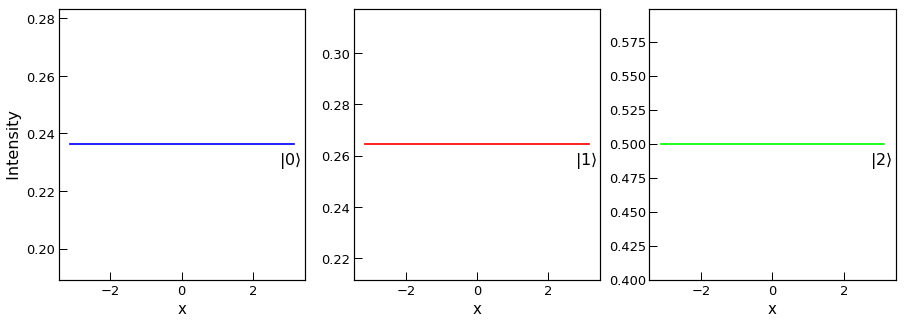

In [3]:
func = lambda x: prob_adj(x,0,0,0,order=1,phi=np.pi/3)
plot_nice(func)

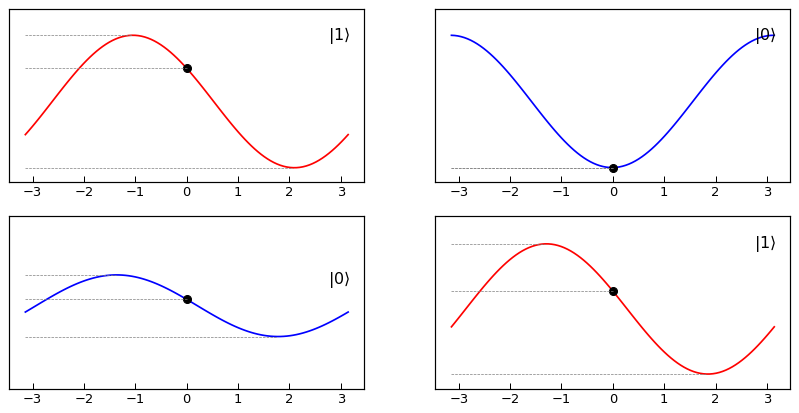

In [15]:
ncols=2
nrows=2
x = np.linspace(-1*np.pi,1*np.pi,101)
fig,axs =plt.subplots(nrows,ncols,figsize=(14,7))
axs = axs.flat
colors = get_colors(3)
indexes = [1,0,0,1]
colors = [colors[i] for i in indexes]
labels = [r"$| %i \rangle$"%i for i in indexes]
xlabels = [r"$\Delta x_%i$"%i for i in range(1,5)]
#axs[0].set_ylabel(' Intensity ', fontsize=16)
#axs[2].set_ylabel(' Intensity ', fontsize=16)

for i ,lab,idx,c,xlb in zip(range(4),labels,indexes,colors,xlabels):
    func = lambda x: prob_adj(*([0]*(i)+[x]+[0]*(3-i)),order=i+2,phi=np.pi/3)
    y = np.array(list(map(lambda x: abs(np.power(func(x),2)),x)))
    plot_ax(axs[i],(x,y.T[idx]),label=''+str(lab),color=c,xlabel='') 
    axs[i].plot([0],y.T[idx][50],'o',color='black',markersize=8)
    #axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    axs[i].tick_params(axis="x",direction="in",labelsize=13,width=1,length=6)
    axs[i].tick_params(axis="y",direction="in",labelsize=13,width=1,length=0)
    y_ = y.T[idx]
    m = np.min(y_)
    perc = (y_-m)[50]/(np.max(y_)-m)
    ax = axs[i]
    ax.plot((-np.pi,0),[y_[50]]*2,'--',color='gray',lw=0.7)
    #ax.text(-np.pi,y_[50]+0.001,r'$%3.2f(I_{max}-I_{min})$'%perc,fontsize=14)
    #ax.text(0.1,y_[50]+0.002,r'$%3.2f(I_{max}-I_{min})$'%perc,fontsize=14)
    # -----------
    v =  np.max(y_)
    idx = np.where(y_==v)[0][0]
    ax.plot((-np.pi,x[idx]),[np.max(y_)]*2,'--',color='gray',lw=0.7)
    #ax.text(-np.pi,v+(lambda x: 0.004 if x==2 else 0.02 )(i),'$I_{max}$',fontsize=12)
    # -----------
    v =  np.min(y_)
    idx = np.where(y_==v)[0][0]
    ax.plot((-np.pi,x[idx]),[np.min(y_)]*2,'--',color='gray',lw=0.7)
    #ax.text(-np.pi,v+(lambda x: 0.004 if x==2 else 0.02 )(i),'$I_{min}$',fontsize=12)
    #axs[i].grid()
plt.savefig('adj'+'.pdf')